In [2]:
import numpy as np
from sage.combinat.cartesian_product import CartesianProduct_iters, CartesianProduct
import matplotlib.pyplot as plt


In [3]:
colors = [ '#4cb963','#57c4e5', '#783f8e', '#ff5964','#BB9F06','#FFB8D1','#A26769','#084B83','#485665','#D972FF','#DEFFFC','#89023E','#F1ECCE','#474B24','#5FBB97','#B2ABBF','#FCF0CC']

In [4]:
def get_Plane(order):
    
    G = GF(order)
    K = list(G)

    K2 = CartesianProduct_iters(K,K)

    aK = merge_sort(np.array(K))
    aKp = (np.array(K))

    aK2 = np.array(K2.list())

    mK2 = np.reshape(aK2, [order,order,2])

    mainLinesF = generateOrderMainLines(mK2, aK)
    #newAlines = generateNewLines(mainLinesF, aK, dilatation)

    CartesianMainLines = vgetPointsRaros(mainLinesF, aK)
    #CartesianLines = vgetPointsRaros(newAlines, aK)
    CartesianLines = []
    return [CartesianMainLines, CartesianLines]



In [5]:
def merge_sort(array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
    if len(array) < 2:
        return array
    

    midpoint = len(array) // 2

    # Sort the array by recursively splitting the input
    # into two equal halves, sorting each half and merging them
    # together into the final result
    return merge(
        left=merge_sort(array[:midpoint]),
        right=merge_sort(array[midpoint:]))


def merge(left, right):
    # If the first array is empty, then nothing needs
    # to be merged, and you can return the second array as the result
    #print('l',left,'r', right)
    if len(left) == 0:
        return right

    # If the second array is empty, then nothing needs
    # to be merged, and you can return the first array as the result
    if len(right) == 0:
        return left

    result = []
    index_left = index_right = 0
    

    # Now go through both arrays until all the elements
    # make it into the resultant array
    while len(result) < len(left) + len(right):
        # The elements need to be sorted to add them to the
        # resultant array, so you need to decide whether to get
        # the next element from the first or the second array
        try:
            condition = left[index_left][0] <= right[index_right][0]
        except:
            condition = left[index_left] <= right[index_right]

        if condition:
            result.append(left[index_left])
            index_left += 1
        else:
            result.append(right[index_right])
            index_right += 1

        # If you reach the end of either array, then you can
        # add the remaining elements from the other array to
        # the result and break the loop
        if index_right == len(right):
            #print(result,left,right)
            for i in left[index_left:]:
                result.append(i)
            break

        if index_left == len(left):
            #print(result,left,right)
            for i in right[index_right:]:
                result.append(i)
            break
            
    #print(result)

    return result

In [6]:
def generateOrderMainLines(mK2,K): #Recibe como parametros dos numpy array uno es el grupo G y el otro es GXG
    
    product = lambda a,t: t*a;
    vproduct = np.vectorize(product,  excluded=['a'])
    vproduct.excluded.add(0)
    mainLines = []
    
    for point in mK2[1,:]: 
        mainLines.append(merge_sort(vproduct(point, np.array(K))))
    
    mainLines.append(merge_sort(vproduct(mK2[0,:][1], np.array(K))))
    return np.array(mainLines)

In [7]:
def product_Zmod3(a,b):
    ab = a*b  
    return ab    

In [8]:
def generateNewLines(mainLines2,group,fdilatation):
    alldirlines  = []
    for l in range(len(mainLines2)): #calcula las demas lineas a partir de la dilatacion
        lines = []

        for i in group:
            
            if mainLines2[l][1][0] == 0: 
                #print(fdilatation(mainLines2[l],i,0,1))
                lines.append(merge_sort(fdilatation(mainLines2[l],i,0,1)))
            elif mainLines2[l][1][1] == 0:
                #print(fdilatation(mainLines2[l],0,i,1))
                lines.append(merge_sort(fdilatation(mainLines2[l],0,i,1)))
            else:
                lines.append(merge_sort(fdilatation(mainLines2[l],i,0,1)))
                #print(fdilatation(mainLines2[l],i,0,1))
                
        alines = np.array(lines)
        alldirlines.append(alines)

    aalldirlines = np.array(alldirlines)
    return aalldirlines


In [9]:
def dilatation(l,a,b,y): #define una dilatacion como se especifica arriba
    return y*l+ np.array([a,b])

In [10]:
def getPointsRaros(a, G):
    valor = 0
    for i in range(len(G)):
        if(a == G[i]):
            valor = i
    return valor


vgetPointsRaros = np.vectorize(getPointsRaros,  excluded=['G'])

vgetPointsRaros.excluded.add(1)

In [11]:
def plot_lines_set(lines, ngrid, colors, folder, sort,size):
    npoints = ngrid
    
    plt_1 = plt.figure(figsize=(size, size))

    xpoint = np.matrix(np.arange(npoints))
    ax = plt.axes()
    ax.set_facecolor("black")

    plt.xticks(np.arange(0, ngrid+1, 1.0))
    plt.yticks(np.arange(0, ngrid+1, 1.0))

    for i in range(npoints):
        plt.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')
                        
    for i in range(len(lines)):
        if sort:
            line = np.array(merge_sort(lines[i]))
        else:
            line = np.array((lines[i]))
        plt.plot(line[:,0],line[:,1], color = colors[i])
    
    plt.show()

    #fig.savefig(f'{folder}linasPrincipalesCadaDireccion{npoints}.png')
    #fig.savefig(f'{folder}linasPrincipalesCadaDireccion{npoints}.svg')


In [12]:
def plot_plano(alines, folder,size):
    npoints = alines.shape[1]
    xpoint = np.matrix(np.arange(npoints))
        
        
    plt_1 = plt.figure(figsize=(size, size))

    xpoint = np.matrix(np.arange(npoints))
    ax = plt.axes()
    ax.set_facecolor("black")


    
    fig2, ax2 = plt.subplots(figsize=(size,size))
    ax2.set_facecolor("black")

    for i in range(len(alines)):
        for j in range(npoints):
            plt.plot(xpoint, np.ones(len(xpoint))*j, '*',color = 'r')
        for line in alines[i]:
            lineO = np.array((line))
            plt.plot(line[:,0],line[:,1], color = colors[i])
    fig2.savefig(f'{folder}tpdoElPlano.png')
    fig2.savefig(f'{folder}tpdoElPlano.svg')


    


In [13]:
def plot_dir(dir, colors, ngrid):
    plt_1 = plt.figure(figsize=(size, size))

    xpoint = np.matrix(np.arange(npoints))
    ax = plt.axes()
    ax.set_facecolor("black")


    for i in range(npoints):
        plt.plot(xpoint, np.ones(len(xpoint))*i, '*',color = 'r')    
       
    for line in alines[dir]:
        lineO = np.array((line))
        plt.plot(lineO[:,0],lineO[:,1], color = colors[dir])
            
    fig.savefig(f'{folder}linasDireccion{j}.png')
    fig.savefig(f'{folder}linasDireccion{j}.svg')      

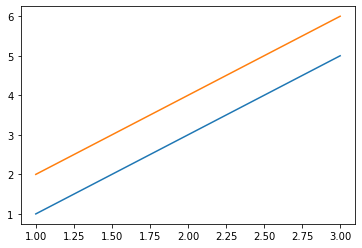

In [14]:
x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y)

In [15]:
def interactive_dirs():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-15-8c9e95c1feab>, line 2)

In [25]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

a=[2,3,4,5,7,8,9]
planos = dict()
for i in a:
    planos[i] = get_Plane(i)

def paint_interactive(a, option):
    if option == 'one line dir':
        plot_lines_set(planos[a][0], a, colors, '', False,10)
    elif  option.contains('single'):
        plot_lines_set(planos[a][1][0], a, colors[dir], '', False,10)


interactive_plot = interactive(paint_interactive, a=[2,3,4,5,7,8,9], option=['one line dir', 'all dir', 'all lines dir'])
output = interactive_plot.children[-1]
interactive_plot

In [17]:


from sage.combinat.cartesian_product import CartesianProduct_iters, CartesianProduct
import sympy as spy

class Plano:
    
    def __init__(self, order):
        self.order = order
        self.field = GF(order)
        self.eField = self.getSortField()
        self.points = CartesianProduct_iters(self.eField,self.eField)
        self.__mainLines()
        self.__allLines()
                
    def getMainLines(self):
        return self.mainLines
    
    def getLines(self):
        return self.lines
    
    def __allLines(self):
        all_lines = []
        for mainLine in self.mainLines:
            all_lines.append(np.array(mainLine.getParallelLines()))
            
        self.lines =  all_lines
    
    
    def __mainLines(self):
        mainLines = list()
        aPoints = np.reshape(np.array(self.points),[self.order,self.order,2])
        
        for dirP in aPoints[1,:]: 
            mainLines.append(Line(dirP, self.eField))
        
        self.mainLines = mainLines
        
    def getOrder(self):
        return self.order
    
    def getField(self):   
        return self.field
    
    def getSortField(self):
        return Point.merge_sort((list(self.field)))
    
    def getPoints(self):
        return self.points
    
    def getNumbersValuesField(self,field):
        vcartesian = np.vectorize(Point.getCartesian,excluded=['G']) 
        vcartesian.excluded.add(1)
        return vcartesian(field, field), field
    



In [26]:
class Line:
    
    def __init__(self, dirP, field):
        self.dirP= dirP
        self.field = field
        self.line = self.__generetaLine()
        self.parallelLines = self.__parallelLines()
        
    
    def __generetaLine(self):
        product = lambda a,t: t*a;
        vproduct = np.vectorize(product,  excluded=['a'])
        vproduct.excluded.add(0)
        
        return Point.merge_sort(vproduct(self.dirP,self.field))
    
    def __parallelLines(self):
        
        lines = []

        for i in self.field:
            
            if self.line[1][0] == 0: 
                lines.append(merge_sort(self.dilatation(self.line,i,0,1)))
            elif self.line[1][1] == 0:
                lines.append(merge_sort(self.dilatation(self.line,0,i,1)))
            else:
                lines.append(merge_sort(self.dilatation(self.line,i,0,1)))
        
        return lines
    
    
        
    def dilatation(self, l,a,b,y): #define una dilatacion como se especifica arriba
        return y*l + np.array([a,b])
    
    def getDirP(self):
        return self.dirP
    
    def toList(self):
        return self.line
    
    def getParallelLines(self):
        return self.parallelLines

In [21]:
class Point:
    def __init__(self,x,y, field):
        self.x = x
        self.y = y
        self.field = field
        
        
    def getX(self):
        return self.x

    def getY(self):
        return self.y
    

    @staticmethod
    def getCartesian(a, G):
        valor = 0
        for i in range(len(G)):
            if(a == G[i]):
                valor = i
        return valor
    @staticmethod
    def merge_sort(array):
    # If the input array contains fewer than two elements,
    # then return it as the result of the function
        if len(array) < 2:
            return array


        midpoint = len(array) // 2

        # Sort the array by recursively splitting the input
        # into two equal halves, sorting each half and merging them
        # together into the final result
        return merge(
            left=merge_sort(array[:midpoint]),
            right=merge_sort(array[midpoint:]))


    def __merge(left, right):
        # If the first array is empty, then nothing needs
        # to be merged, and you can return the second array as the result
        #print('l',left,'r', right)
        if len(left) == 0:
            return right

        # If the second array is empty, then nothing needs
        # to be merged, and you can return the first array as the result
        if len(right) == 0:
            return left

        result = []
        index_left = index_right = 0


        # Now go through both arrays until all the elements
        # make it into the resultant array
        while len(result) < len(left) + len(right):
            # The elements need to be sorted to add them to the
            # resultant array, so you need to decide whether to get
            # the next element from the first or the second array
            try:
                condition = left[index_left][0] <= right[index_right][0]
            except:
                condition = left[index_left] <= right[index_right]

            if condition:
                result.append(left[index_left])
                index_left += 1
            else:
                result.append(right[index_right])
                index_right += 1

            # If you reach the end of either array, then you can
            # add the remaining elements from the other array to
            # the result and break the loop
            if index_right == len(right):
                #print(result,left,right)
                for i in left[index_left:]:
                    result.append(i)
                break

            if index_left == len(left):
                #print(result,left,right)
                for i in right[index_right:]:
                    result.append(i)
                break

        #print(result)

        return result
        
    

In [530]:
def get_Plane(order):
    
    G = GF(order)
    K = list(G)

    K2 = CartesianProduct_iters(K,K)

    aK = merge_sort(np.array(K))
    aKp = (np.array(K))

    aK2 = np.array(K2.list())

    mK2 = np.reshape(aK2, [order,order,2])

    mainLinesF = generateOrderMainLines(mK2, aK,product_Zmod3)
    newAlines = generateNewLines(mainLinesF, aK, dilatation)

    CartesianMainLines = vgetPointsRaros(mainLinesF, aK)
    CartesianLines = vgetPointsRaros(newAlines, aK)
    
    return [CartesianMainLines, CartesianLines]

In [33]:
P4 = Plano(2)
P4.getOrder()
print(P4.getNumbersValuesField(list(P4.getField())))
print(P4.getSortField())
print(P4.getNumbersValuesField(list(P4.getSortField())))
print(list(P4.getPoints()))
print((P4.getMainLines()[2].toList()))



(array([0, 1]), [0, 1])
[0, 1]
(array([0, 1]), [0, 1])
[[0, 0], [0, 1], [1, 0], [1, 1]]


IndexError: list index out of range